In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns


/Users/alexandranava/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
weights_filepath = "/Users/alexandranava/Desktop/Spores/GerminationPrediction/initial_0_V4.h5"
features = ["INTENSITY", 'GERMINANT_EXPOSURE', 'AREA', "ELLIPSE_MINOR", "PERIMETER", 'GERMINATION']

model = tf.keras.models.load_model(weights_filepath)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80)                27840     
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 27921 (109.07 KB)
Trainable params: 27921 (109.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


LSTM layers have 3 arrays: kernel weights, recurrent weights, and biases: 

Kernel weights shape: (input_dim, 4 * units) connects input features to LSTM units it includes weights for th einput, forget, cell, and output gates

recurrent weights shape: (units, 4 * units) weights for same four gates 

biases shape: (4 * units) 

Each LSTM unit has four gates that control the flow of information:

Input Gate: Controls the amount of new information added to the cell state.

Forget Gate: Controls the amount of information retained from the previous cell state.

Cell Gate: Updates the cell state with new information.

Output Gate: Controls the amount of information passed to the next hidden state.

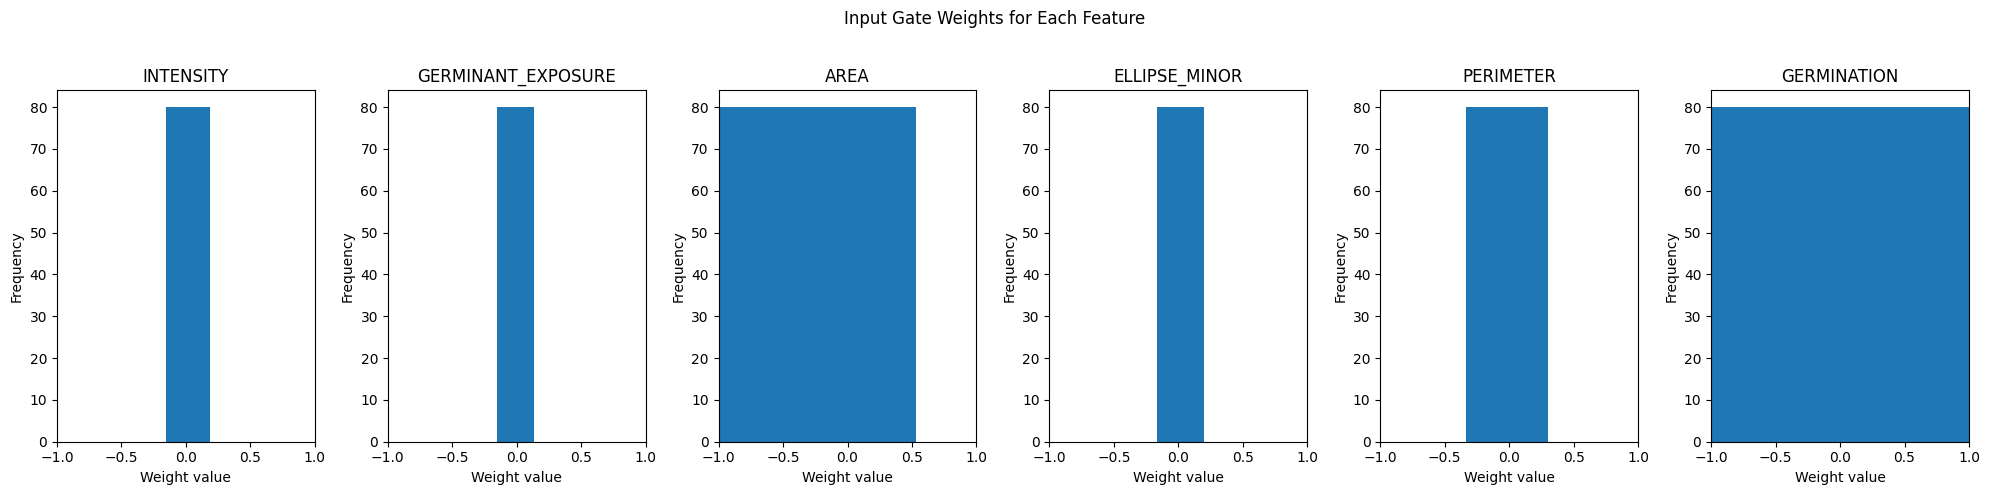

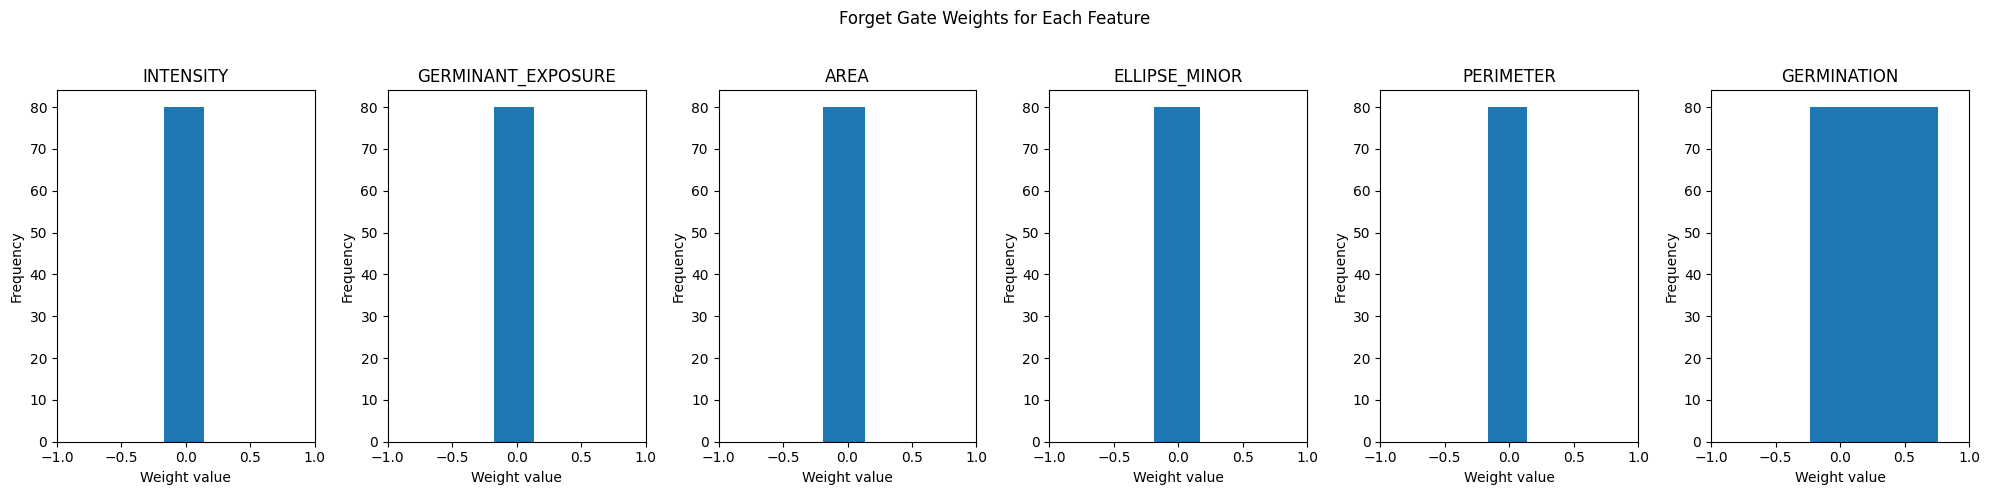

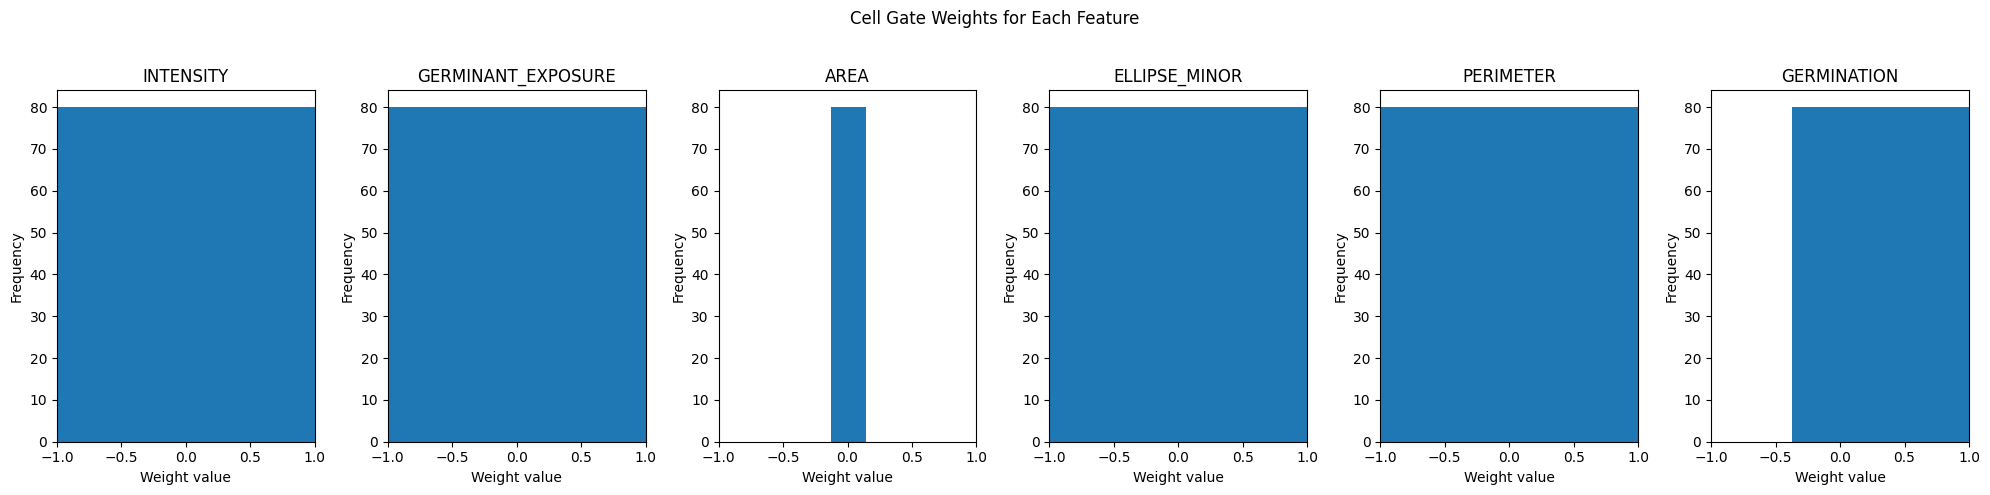

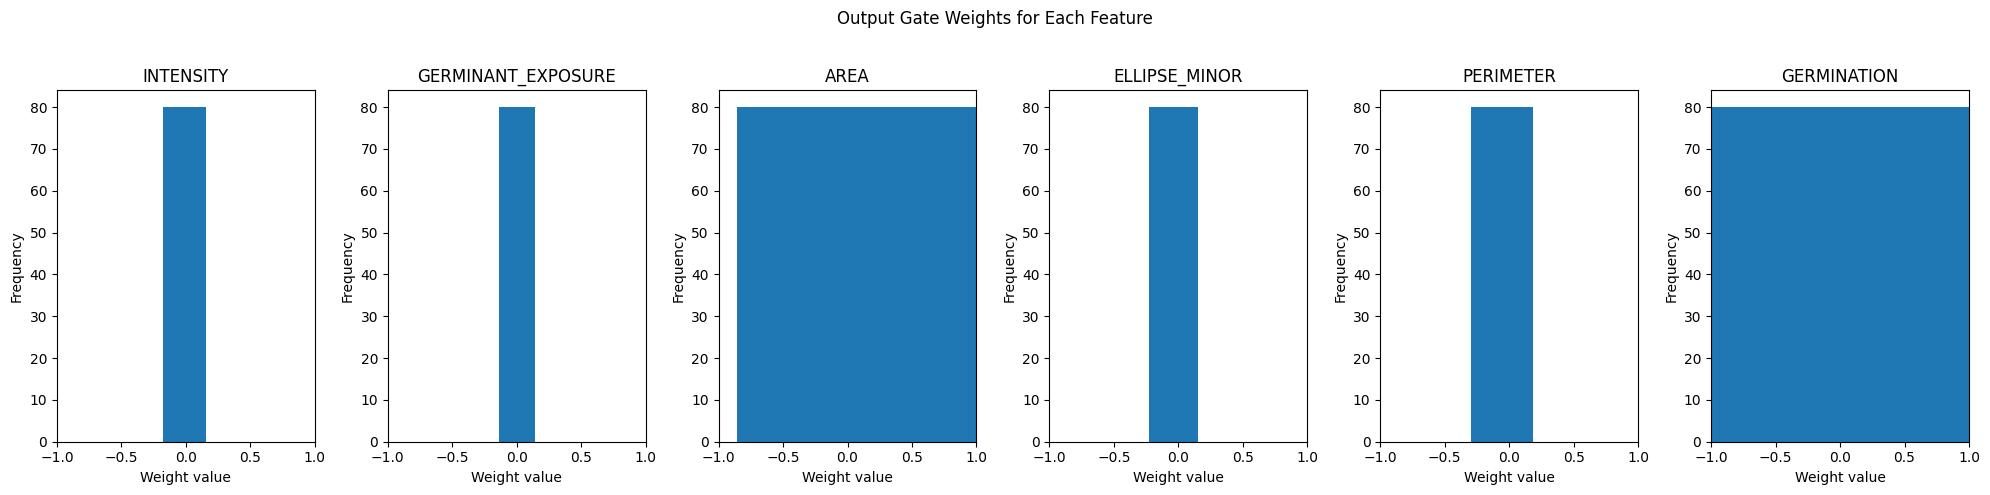

In [4]:
lstm_layer = model.get_layer('lstm')
weights = lstm_layer.get_weights()

# Assuming input_dim and units are known
input_dim = weights[0].shape[0]
units = lstm_layer.units

# Separate weights for each gate
input_weights = weights[0]
recurrent_weights = weights[1]
biases = weights[2]

input_gate_weights = input_weights[:, :units]
forget_gate_weights = input_weights[:, units:units*2]
cell_gate_weights = input_weights[:, units*2:units*3]
output_gate_weights = input_weights[:, units*3:]

def plot_feature_weight_histograms(weights, title_prefix, features):
    num_features = len(features)
    fig, axes = plt.subplots(1, num_features, figsize=(20, 5))
    fig.suptitle(f'{title_prefix} Weights for Each Feature')
    for i in range(num_features):
        axes[i].hist(weights[i, :], bins=1)
        axes[i].set_xlabel('Weight value')
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(features[i])
        axes[i].set_xlim([-1,1])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Plot histograms for each gate's weights per feature
plot_feature_weight_histograms(input_gate_weights, 'Input Gate', features)
plot_feature_weight_histograms(forget_gate_weights, 'Forget Gate', features)
plot_feature_weight_histograms(cell_gate_weights, 'Cell Gate', features)
plot_feature_weight_histograms(output_gate_weights, 'Output Gate', features)